In [55]:
from IPython.display import Image
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

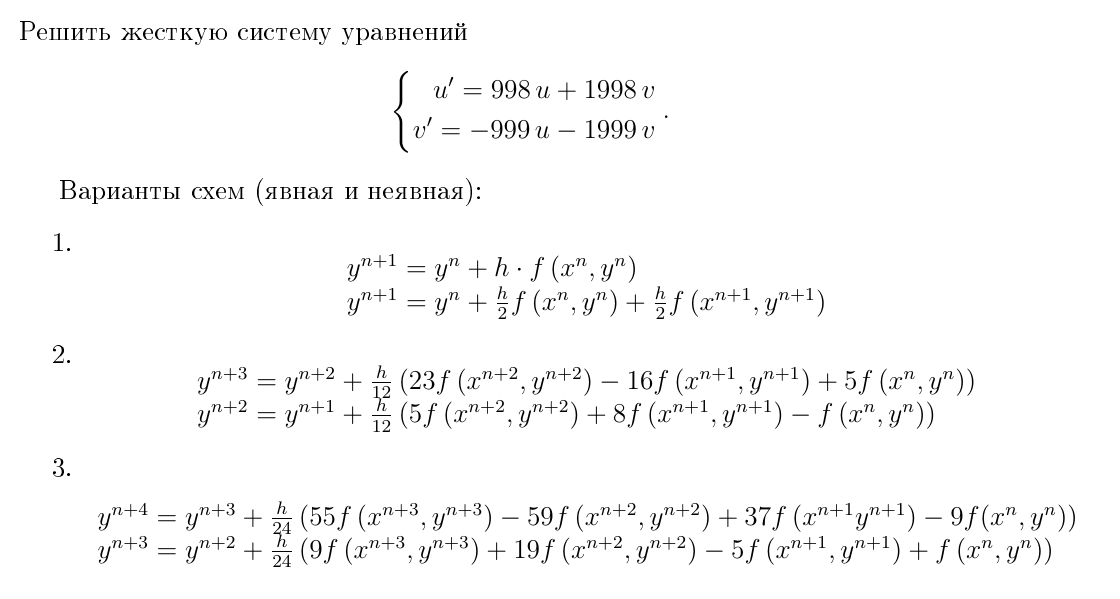

In [56]:
Image('task 8.png')

p102-103

$$\Large \displaystyle  \left( \begin{matrix} u_{n+1}^{(0)} \\ v_{n+1}^{(0)} \\ \end{matrix} \right ) =   \left( \begin{matrix} u_{n} \\ v_{n} \\ \end{matrix} \right ) $$
$$\Large \displaystyle  \left( \begin{matrix} u_{n+1}^{(1)} \\ v_{n+1}^{(1)} \\ \end{matrix} \right ) =   \left( \begin{matrix} u_{n} \\ v_{n} \\ \end{matrix} \right )
+ \left[ E - h J^{(0)} \right] \cdot \left( \begin{matrix} u_{n} - u_{n+1}^{(0)} + hf^{(0)} \\ v_{n} - v_{n+1}^{(0)} + hg^{(0)} \\ \end{matrix} \right) =
\left( \begin{matrix} u_{n} \\ v_{n} \\ \end{matrix} \right )
+ \left[ E - h J^{(0)} \right] \cdot \left( \begin{matrix} hf(u_n, g_n) \\ hg(u_n, v_n) \\ \end{matrix} \right)$$


In [57]:
x0, u0, v0 = 0, 1, 1
min_x, max_x = 0, 6

N = 10000
h = (max_x-min_x)/N

In [58]:
a, b, c, d = 998, 1998, -999, -1999
mtx = np.array([[a, b], [c, d]])

du = lambda u, v: a*u + b*v
dv = lambda u, v: c*u + d*v
f = lambda u, v: np.dot(mtx, [u, v])

vect1 = np.array([2., -1.])
vect2 = np.array([1., -1.])
sol_mtx = np.array([vect1, vect2]).transpose()

alpha, beta = np.dot(linalg.inv(sol_mtx), (u0, v0))

def solution(x):
    coefs = sol_mtx*[alpha, beta]
    return np.dot(coefs, [np.exp(-x), np.exp(-1000*x)])

In [59]:
def Euler_explicit(r0, N, h):
    r = [r0]
    for i in range(N):
        r += [r[-1] + h * f(r[-1][0], r[-1][1])]
    return np.array(r).transpose()

def Euler_implicit(r0, N, h):
    r = [r0]
    for i in range(N):
        M = linalg.inv(np.eye(2) - h * mtx)
        r += [r[-1] + h * np.dot(M, f(r[-1][0], r[-1][1]))]
    return np.transpose(r)

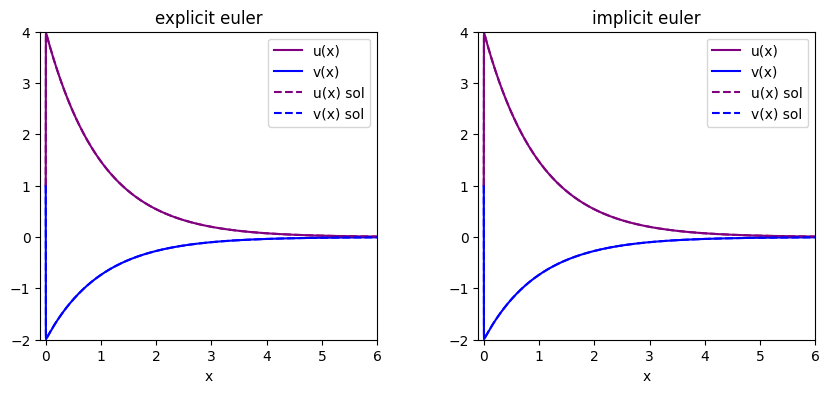

In [60]:
x_data = np.linspace(min_x, max_x, N+1)
u_solution, v_solution = solution(x_data)

u_ex, v_ex = Euler_explicit((u0, v0), N, h)
u_im, v_im = Euler_explicit((u0, v0), N, h)

fig = plt.figure(figsize=(10, 4))

plt_ex = fig.add_subplot(121)
plt_im = fig.add_subplot(122)

plt_ex.set_title('explicit euler')
plt_ex.set_xlabel('x')
plt_ex.axis([-0.1, 6, -2, 4])
plt_ex.plot(x_data, u_ex, color='purple', label='u(x)')
plt_ex.plot(x_data, v_ex, color='blue', label='v(x)')
plt_ex.plot(x_data, u_solution, color='purple', label='u(x) sol', linestyle='dashed')
plt_ex.plot(x_data, v_solution, color='blue', label='v(x) sol', linestyle='dashed')

plt_im.set_title('implicit euler')
plt_im.set_xlabel('x')
plt_im.axis([-0.1, 6, -2, 4])
plt_im.plot(x_data, u_im, color='purple', label='u(x)')
plt_im.plot(x_data, v_im, color='blue', label='v(x)')
plt_im.plot(x_data, u_solution, color='purple', label='u(x) sol', linestyle='dashed')
plt_im.plot(x_data, v_solution, color='blue', label='v(x) sol', linestyle='dashed')

fig.subplots_adjust(hspace=0.3, wspace=0.3)
plt_ex.legend()
plt_im.legend()
plt.show()